# Wild Blueberry Yield Prediction Using Regression

(Please run the code on codespace or Visual Studio in order to view all the graphs)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import xgboost as xgb


sns.set_style('darkgrid')

%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
test_df = pd.read_csv("test.csv")

In [5]:
train_df

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.335530,0.376880,28.282868,3387.78516
1,1,385.0,12.5,0.25,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.584016,0.488639,40.813181,7861.46538
2,2,672.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.494907,0.424657,35.923314,6030.98074
3,3,643.0,25.0,0.50,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.476365,0.428771,33.847079,5628.88280
4,4,546.0,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.346411,0.355876,27.621548,3502.08292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,331.0,12.5,0.25,0.25,0.75,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.571610,0.486632,39.917343,7793.44206
14996,14996,517.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.392583,0.401670,30.795613,4305.51182
14997,14997,337.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.490017,0.442529,35.728223,5674.02852
14998,14998,593.0,25.0,0.50,0.25,0.63,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.429001,0.406618,31.928816,4905.49871


This dataset contains 15000 rows and 19 columns. We have no categorical columns. Our objective is to create a model to predict the yield in the "yield" column.

In [6]:
train_df.info()

print("\n\nMissing Values in every column: ")
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

There are no categorical columns in this dataset. Moreover, there are no null values in any of the columns now.

## Exploratory Data Analysis and Visualization

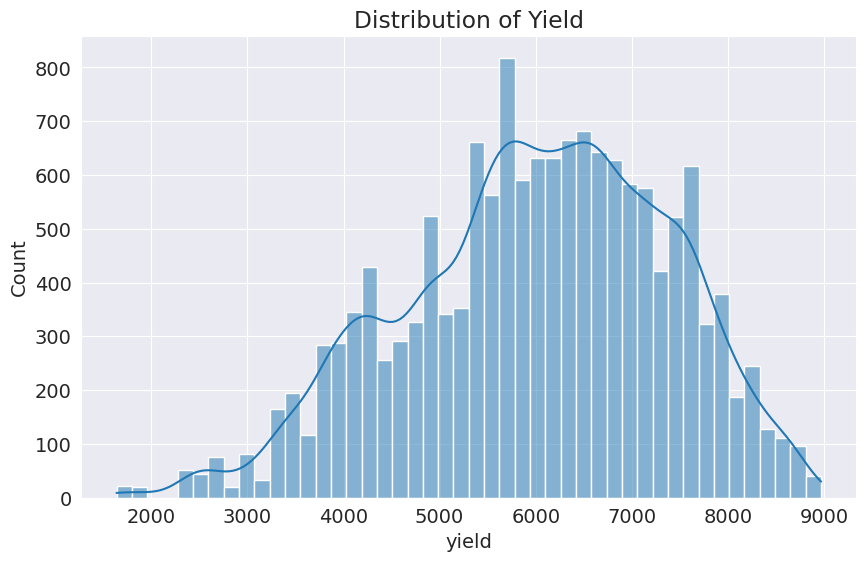

In [7]:
# Distribution of yield
sns.histplot(data=train_df, x='yield', kde=True)
plt.title("Distribution of Yield")
plt.show()

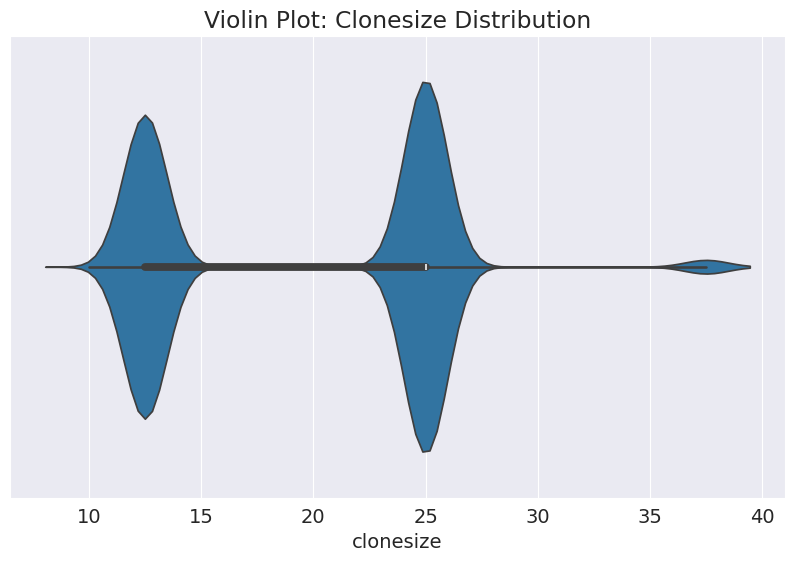

In [8]:
sns.violinplot(data=train_df, x='clonesize')
plt.title("Violin Plot: Clonesize Distribution")
plt.show()

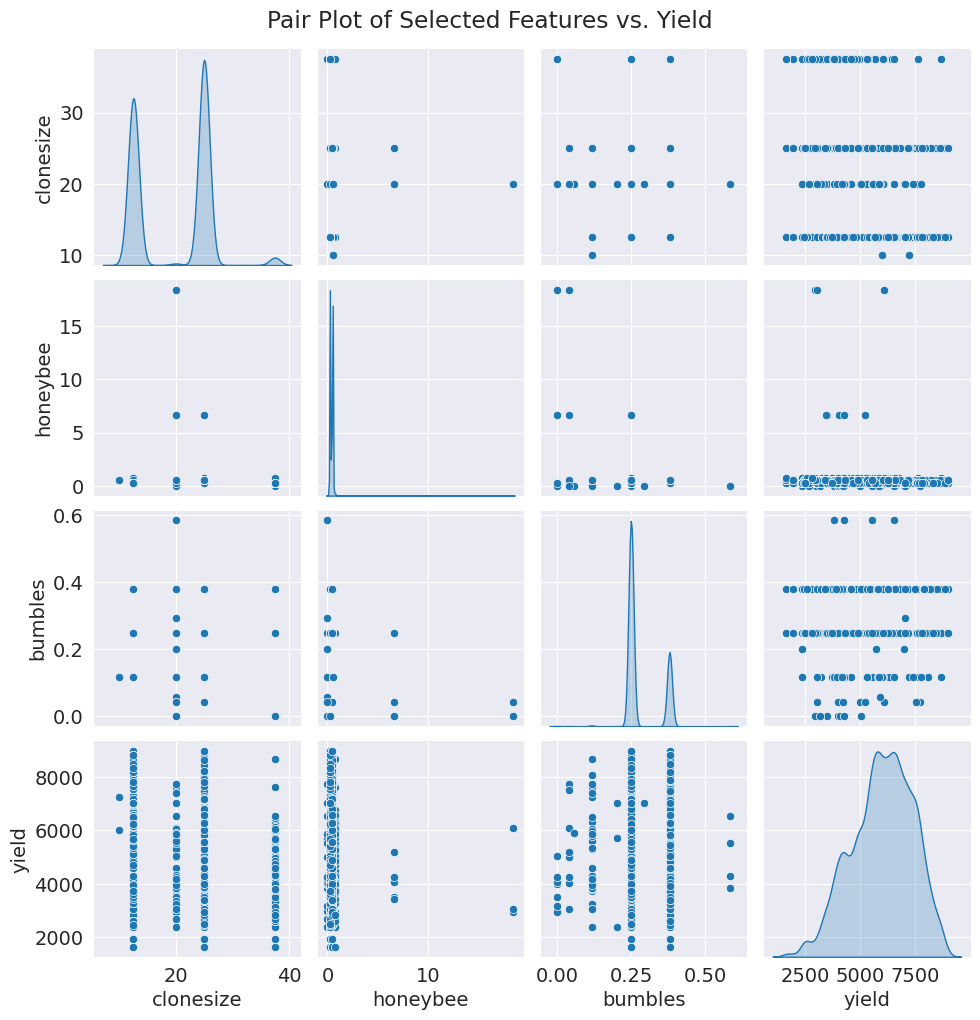

In [9]:
sns.pairplot(
    data=train_df, 
    vars=['clonesize', 'honeybee', 'bumbles', 'yield'],
    diag_kind='kde'
)
plt.suptitle("Pair Plot of Selected Features vs. Yield", y=1.02)
plt.show()

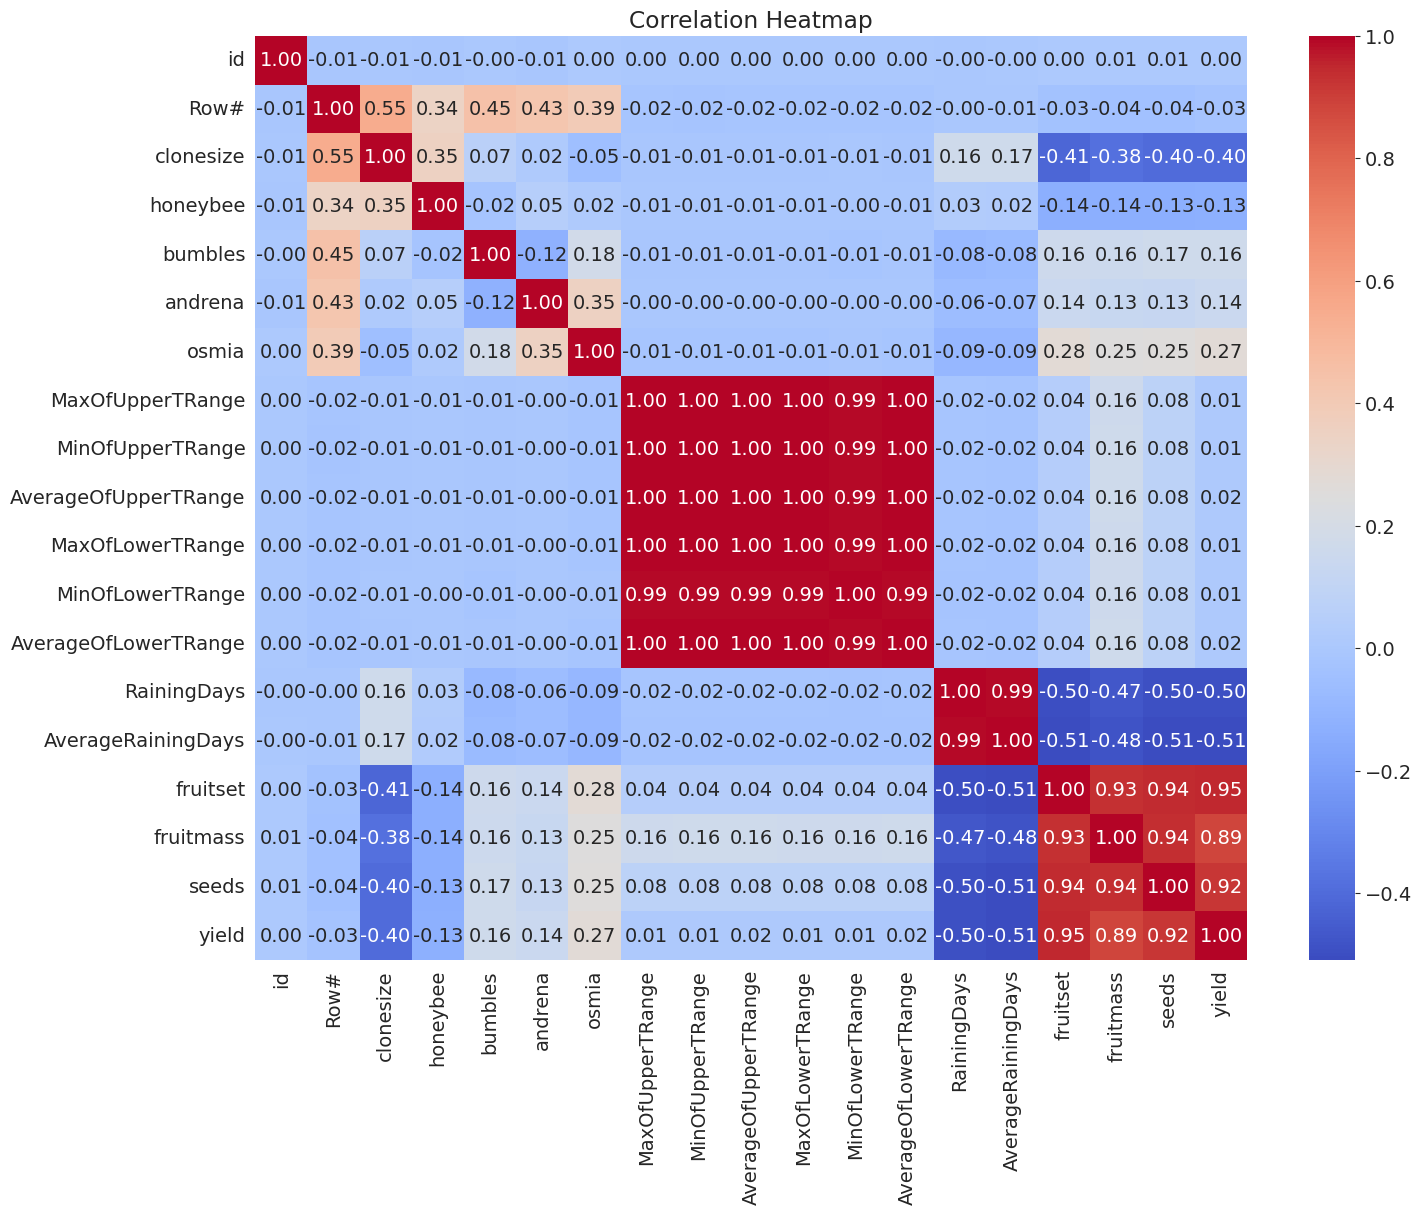

In [10]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Create Training, Validation, and Test Splits

Here, we already have a seperate test set given. So, we split train_df to create a validation set.

In [11]:
train_df2, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [12]:
print('train_df2.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df2.shape : (15000, 19)
val_df.shape : (1500, 19)
test_df.shape : (10000, 18)


## Identifying Input and Target Columns

In [13]:
train_df.columns

Index(['id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

Here 'id' and 'Row#' columns are not useful for training the model. So, in our training, validation and test sets, we ignore these columns.

In [14]:
input_cols = list(train_df.columns)[2:-1]
input_cols

['clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [15]:
target_col = 'yield'

In [16]:
train_inputs = train_df2[input_cols].copy()
train_targets = train_df2[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [17]:
train_inputs

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
11810,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.574679,0.488527,40.655498
970,12.5,0.25,0.25,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.530112,0.467854,36.976361
1598,25.0,0.50,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.476178,0.417909,34.849953
11805,25.0,0.50,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.395912,0.400304,31.112670
2582,12.5,0.25,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.584921,0.488569,40.738266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,25.0,0.50,0.25,0.63,0.75,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.443712,0.424874,31.597416
13418,12.5,0.25,0.38,0.50,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.527190,0.462761,37.678285
5390,12.5,0.25,0.25,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.532557,0.451037,36.301847
860,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.524563,0.456451,36.166044


In [18]:
train_targets

11810    7608.62182
970      6115.94707
1598     5728.74828
11805    4572.12637
2582     7639.54789
            ...    
5191     4867.94772
13418    6412.47345
5390     6749.51819
860      6691.04322
7270     8969.40184
Name: yield, Length: 13500, dtype: float64

## Scaling Numeric Features

In this section, we scale all the numeric features to a range between (0,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train_df2[input_cols])

MinMaxScaler()

Now, we seperately scale the training, validation, and test sets using the transform method of scalar.

In [21]:
# Transform the datasets
train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

In [22]:
# Convert back to DataFrame for easier handling
train_inputs = pd.DataFrame(train_inputs_scaled, columns=input_cols, index=train_inputs.index)
val_inputs = pd.DataFrame(val_inputs_scaled, columns=input_cols, index=val_inputs.index)
test_inputs = pd.DataFrame(test_inputs_scaled, columns=input_cols, index=test_inputs.index)

Now, let us review if each of the numeric columns have been appropriately scaled.

In [23]:
train_inputs[input_cols].describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
count,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000,13500.000000
mean,0.354438,0.020887,0.485418,0.648653,0.784757,0.424725,0.631542,0.557241,0.507323,0.100522,0.358266,0.533856,0.572333,0.478435,0.449085,0.575238
std,0.241482,0.017228,0.100842,0.198771,0.195987,0.308166,0.274786,0.330964,0.367432,0.073226,0.259338,0.361804,0.304529,0.122644,0.069111,0.170300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.090909,0.013565,0.427350,0.506667,0.666667,0.259259,0.485149,0.380952,0.311111,0.061503,0.221154,0.454545,0.454545,0.401874,0.400437,0.458737
50%,0.545455,0.027130,0.427350,0.666667,0.840000,0.548822,0.742574,0.692641,0.655556,0.129841,0.461538,0.454545,0.454545,0.486298,0.449493,0.570380
75%,0.545455,0.027130,0.649573,0.840000,1.000000,0.548822,0.742574,0.692641,0.655556,0.129841,0.461538,0.696970,0.690909,0.575499,0.496118,0.700478
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Saving Processed Data to Disk

In [24]:
import sys
!{sys.executable} -m pip install pyarrow
!{sys.executable} -m pip install fastparquet

import pyarrow
import fastparquet

In [25]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

Now that the processed data has been stored to the disk, we do not have to repeat the preprocessing steps every time you use the jupyter notebook. The saved data can be read back using 'pd.read_parquet'.

## Training a Regression Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Fit the model
model.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=500, random_state=42)

In [27]:
#model.fit(train_inputs, train_targets)

## Making Predictions and Evaluating the Model

In [28]:
# 1. Training Predictions
train_preds = model.predict(train_inputs)
train_rmse = root_mean_squared_error(train_targets, train_preds)
train_r2 = r2_score(train_targets, train_preds)

print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R^2:  {train_r2:.4f}")

Training RMSE: 331.7832
Training R^2:  0.9419


In [29]:
# 2. Validation Predictions
val_preds = model.predict(val_inputs)
val_rmse = root_mean_squared_error(val_targets, val_preds)
val_r2 = r2_score(val_targets, val_preds)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R^2:  {val_r2:.4f}")

Validation RMSE: 375.5168
Validation R^2:  0.9189


## Generate Predictions for Test Set

In [30]:
test_preds = model.predict(test_inputs) 

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'yield': test_preds
})

submission_df.to_csv("submission.csv", index=False)

submission_df.head()

,id,yield
0,15000,3258.179495
1,15001,6536.732241
2,15002,4419.280582
3,15003,7689.488800
4,15004,3927.488564


## Save the Trained Model

In [32]:
data_to_save = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col
}

joblib.dump(data_to_save, "wild_blueberry_yield_model.joblib")

['wild_blueberry_yield_model.joblib']